In [1]:
from pets_utilities import *
from plotting_utilities import *

from scipy.optimize import curve_fit

from seaborn import heatmap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# Experimental Measurement of Accuracy of Counts and Accuracy of Distribution

In [3]:
count_accuracy_simulate_run_functions = [create_simulate_run_from_constructor(max_heuristic_constructor), 
                                         create_simulate_run_from_constructor(min_heuristic_constructor), 
                                         create_simulate_run_from_constructor(sandwich_heuristic_constructor), 
                                         create_simulate_run_from_constructor(interior_method_fixed_point_constructor),  
                                         create_simulate_run_from_alg_description(discrete_gaussian),
                                         simulate_run_truncated_geom,
                                         #create_simulate_run_from_alg_description(staircase), ## behavior is visually overlapping with truncated geom, so omitting for plots
                                         create_simulate_run_from_constructor(unfixed_baseline_constructor),
                                        ]

### Binomial

In [20]:
np.random.seed(42)

binom_cost_res = accuracy_experiment(replications= 10, 
                                     emp_hist = binom_hist_dataset, 
                                     simulate_run_functions = count_accuracy_simulate_run_functions, 
                                     total_epsilon_values = 10**np.linspace(-1, np.log10(5), 11))

Laplace Epsilon 0.05061068106773723 Counting Epsilon 0.049389318932262775: 
Laplace Epsilon 0.06724947874244616 Counting Epsilon 0.08062628492038523: 
Laplace Epsilon 0.0854308690408858 Counting Epsilon 0.1332415457477698: 
Laplace Epsilon 0.1024571754876962 Counting Epsilon 0.22090632780098243: 
Laplace Epsilon 0.11537001302694223 Counting Epsilon 0.3628062368680762: 
Laplace Epsilon 0.12458871990490233 Counting Epsilon 0.5825180612816452: 
Laplace Epsilon 0.1387050165094179 Counting Epsilon 0.906934536081855: 
Laplace Epsilon 0.17384558181998813 Counting Epsilon 1.3724018917349705: 
Laplace Epsilon 0.24437538282588672 Counting Epsilon 2.0421498768107447: 
Laplace Epsilon 0.3589320757348108 Counting Epsilon 3.022284613296395: 
Laplace Epsilon 0.530612031341755 Counting Epsilon 4.469387968658246: 


### Crime

In [4]:
np.random.seed(42)

crime_cost_res = accuracy_experiment(replications= 10, 
                                     emp_hist = crime_hist(crime_n),
                                     simulate_run_functions = count_accuracy_simulate_run_functions, 
                                     total_epsilon_values = 10**np.linspace(-1, np.log10(5), 11))

Laplace Epsilon 0.05061068106773723 Counting Epsilon 0.049389318932262775: 
Laplace Epsilon 0.06724947874244616 Counting Epsilon 0.08062628492038523: 
Laplace Epsilon 0.0854308690408858 Counting Epsilon 0.1332415457477698: 
Laplace Epsilon 0.1024571754876962 Counting Epsilon 0.22090632780098243: 
Laplace Epsilon 0.11537001302694223 Counting Epsilon 0.3628062368680762: 
Laplace Epsilon 0.12458871990490233 Counting Epsilon 0.5825180612816452: 
Laplace Epsilon 0.1387050165094179 Counting Epsilon 0.906934536081855: 
Laplace Epsilon 0.17384558181998813 Counting Epsilon 1.3724018917349705: 
Laplace Epsilon 0.24437538282588672 Counting Epsilon 2.0421498768107447: 
Laplace Epsilon 0.3589320757348108 Counting Epsilon 3.022284613296395: 
Laplace Epsilon 0.530612031341755 Counting Epsilon 4.469387968658246: 


### Schools

In [24]:
np.random.seed(42)

school_cost_res = accuracy_experiment(replications= 10, 
                                     emp_hist = schools_hist(schools_n),
                                     simulate_run_functions = count_accuracy_simulate_run_functions, 
                                     total_epsilon_values = 10**np.linspace(-1, np.log10(5), 11))

Laplace Epsilon 0.05061068106773723 Counting Epsilon 0.049389318932262775: 
Laplace Epsilon 0.06724947874244616 Counting Epsilon 0.08062628492038523: 
Laplace Epsilon 0.0854308690408858 Counting Epsilon 0.1332415457477698: 
Laplace Epsilon 0.1024571754876962 Counting Epsilon 0.22090632780098243: 
Laplace Epsilon 0.11537001302694223 Counting Epsilon 0.3628062368680762: 
Laplace Epsilon 0.12458871990490233 Counting Epsilon 0.5825180612816452: 
Laplace Epsilon 0.1387050165094179 Counting Epsilon 0.906934536081855: 
Laplace Epsilon 0.17384558181998813 Counting Epsilon 1.3724018917349705: 
Laplace Epsilon 0.24437538282588672 Counting Epsilon 2.0421498768107447: 
Laplace Epsilon 0.3589320757348108 Counting Epsilon 3.022284613296395: 
Laplace Epsilon 0.530612031341755 Counting Epsilon 4.469387968658246: 


# Accuracy of Counts Plots

In [2]:
labels_count_error = {
    'sandwich_heuristic_constructor': 'Heuristic (Sandwich)',
    'max_heuristic_constructor': 'Heuristic (Max Selector)',
    'min_heuristic_constructor': 'Heuristic (Min Selector)',
    'interior_method_fixed_point_constructor': 'Count-Err-Min. Fixed-Point',
    'Unconstrained Optimum': 'Unconstrained Optimum',
    'unfixed_baseline_constructor': '2-Stage Unfixed Optimum',
    'truncated_geom': 'Trun Geom / Staircase',
    'discrete_gaussian': 'Discrete Gaussian'
}

### Plot: Expected Absolute Deviation -- Figure 6 in Paper

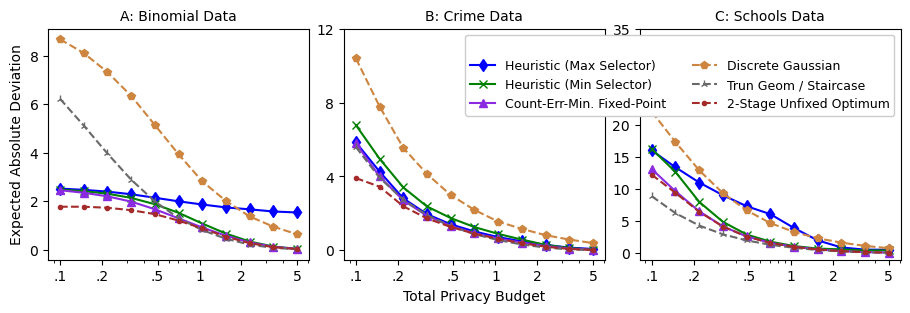

In [23]:
fp_methods = ['max_heuristic_constructor', 'min_heuristic_constructor', 'interior_method_fixed_point_constructor']
uf_methods = ['discrete_gaussian','truncated_geom', 'unfixed_baseline_constructor']

fig, ax = plt.subplots(1,3,figsize=(11, 3))
plt.subplots_adjust( wspace=0.135 )


style=itertools.cycle(['-', '--', '-.', ':', ' ']) 

ax[0].plot([], [], ' ', label=" ") ## For spacing

for method in fp_methods:
    temp = binom_cost_res[binom_cost_res.method == method]
    ax[0].plot(temp['total_epsilon'], temp['mean L1 noise'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])

ax[0].plot([], [], ' ', label=" ") ## For spacing   
    
for method in uf_methods:
    temp = binom_cost_res[binom_cost_res.method == method]
    ax[0].plot(temp['total_epsilon'], temp['mean L1 noise'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
        
    
ax[0].set_xscale('log')
ax[0].set_xticks([.1,.2 , .5, 1,2,5])
ax[0].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[0].set_ylabel("Expected Absolute Deviation")
ax[0].set_title("A: Binomial Data", fontsize=10)


methods_count_accuracy_plot = fp_methods + uf_methods

for method in methods_count_accuracy_plot:
    temp = crime_cost_res[(crime_cost_res.method == method)]
    ax[1].plot(temp['total_epsilon'], temp['mean L1 noise'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
ax[1].set_xscale('log')
ax[1].set_xticks([.1, .2 , .5, 1,2,5])
ax[1].set_xticklabels(['.1', '.2','.5','1', '2','5' ])
ax[1].set_yticks([0,4, 8, 12])
ax[1].set_title("B: Crime Data", fontsize=10)
ax[1].set_xlabel("Total Privacy Budget")


ax[2].plot([], [], ' ', label=" ") ## For spacing

for method in fp_methods:
    temp = school_cost_res[school_cost_res.method == method]
    ax[2].plot(temp['total_epsilon'], temp['mean L1 noise'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])

ax[2].plot([], [], ' ', label=" ") ## For spacing   
    
for method in uf_methods:
    temp = school_cost_res[school_cost_res.method == method]
    ax[2].plot(temp['total_epsilon'], temp['mean L1 noise'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
        

ax[2].set_xscale('log')
ax[2].set_xticks([.1, .2 , .5, 1,2,5])
ax[2].set_xticklabels(['.1','.2','.5','1', '2','5' ])
ax[2].set_title("C: Schools Data", fontsize=10)
ax[2].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])

ax[2].legend(loc='upper right', framealpha = 1, fontsize=9, ncol = 2) ## or "upper left", etc

plt.show()
#plt.savefig('noise_combined.png', bbox_inches='tight', dpi = 300)

### Plot: Mean Squared Error

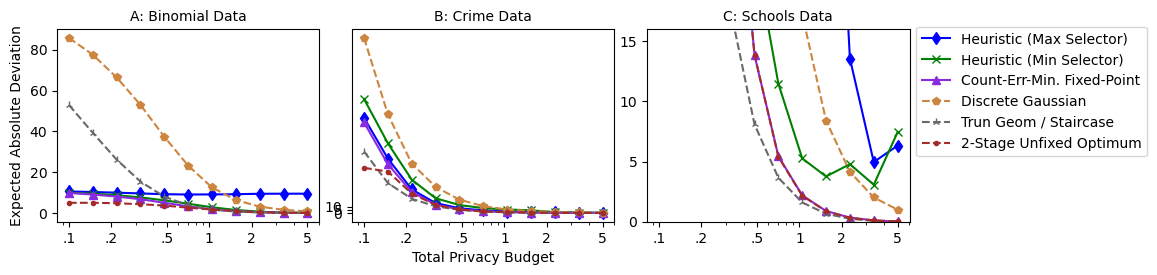

In [22]:
methods_count_accuracy_plot = binom_cost_res.method.unique().tolist()
methods_count_accuracy_plot.remove('sandwich_heuristic_constructor')


fig, ax = plt.subplots(1,3,figsize=(11, 2.5))
plt.subplots_adjust( wspace=0.125 )


style=itertools.cycle(['-', '--', '-.', ':', ' '])

for method in methods_count_accuracy_plot:
    temp = binom_cost_res[binom_cost_res.method == method]
    ax[0].plot(temp['total_epsilon'], temp['mean MSE'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
ax[0].set_xscale('log')
ax[0].set_xticks([.1,.2 , .5, 1,2,5])
ax[0].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[0].set_ylabel("Expected Absolute Deviation")
ax[0].set_title("A: Binomial Data", fontsize=10)

for method in methods_count_accuracy_plot:
    temp = crime_cost_res[(crime_cost_res.method == method)]
    ax[1].plot(temp['total_epsilon'], temp['mean MSE'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
ax[1].set_xscale('log')
ax[1].set_xticks([.1, .2 , .5, 1,2,5])
ax[1].set_xticklabels(['.1', '.2','.5','1', '2','5' ])
ax[1].set_yticks([0,5,10])
ax[1].set_xlabel("Total Privacy Budget")
ax[1].set_title("B: Crime Data", fontsize=10)



for method in methods_count_accuracy_plot:
    temp = school_cost_res[school_cost_res.method == method]
    ax[2].plot(temp['total_epsilon'], temp['mean MSE'], label = labels_count_error[method], marker = markers[method], linestyle = linestyles[method], color = colors[method])
ax[2].set_xscale('log')
ax[2].set_xticks([.1, .2 , .5, 1,2,5])
ax[2].set_xticklabels(['.1','.2','.5','1', '2','5' ])
ax[2].set_title("C: Schools Data", fontsize=10)
ax[2].set_ylim(0,16)
ax[2].legend(bbox_to_anchor=(1, 1.05))

plt.show()
#plt.savefig('noise_combined_MSE.png', bbox_inches='tight')

# Accuracy of Distribution Plots

In [30]:
labels_dist_error = {
    'sandwich_heuristic_constructor': 'Repr Fixed-Point',
    'unfixed_baseline_constructor': '2-Stage Unfixed Optimum',
    'truncated_geom': 'Trunc Geom / Staircase',
    'discrete_gaussian': 'Discrete Gaussian'
}

colors_dist_error = {
    'sandwich_heuristic_constructor': 'red',
    'unfixed_baseline_constructor': 'brown',
    'truncated_geom': 'dimgrey',
    'discrete_gaussian': 'peru'
}


methods_dist_plot = ['unfixed_baseline_constructor', 
                     'sandwich_heuristic_constructor', 
                     'truncated_geom', 
                     'discrete_gaussian']

### Plot: Total Deviation

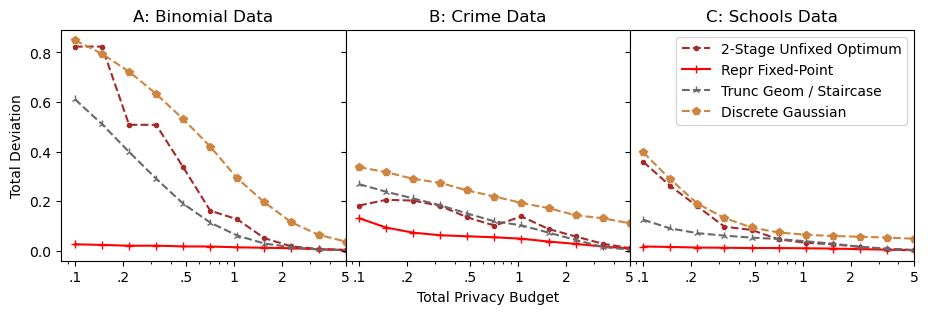

In [31]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(11, 3))
plt.subplots_adjust(wspace=0)


for method in methods_dist_plot:
    temp = binom_cost_res[binom_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[0].plot(temp['total_epsilon'], temp['mean total deviation'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])
    
ax[0].set_xscale('log')
ax[0].set_xticks([.1,.2 , .5, 1,2,5])
ax[0].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[0].set_xlim((0,5))
ax[0].set_ylabel("Total Deviation")
ax[0].set_title("A: Binomial Data")

############

for method in methods_dist_plot:
    temp = crime_cost_res[crime_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[1].plot(temp['total_epsilon'], temp['mean total deviation'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[1].set_xscale('log')
ax[1].set_xticks([.1,.2 , .5, 1,2,5])
ax[1].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[1].set_xlim((0,5))
ax[1].set_xlabel("Total Privacy Budget")
ax[1].set_title("B: Crime Data")

##############

for method in methods_dist_plot:
    temp = school_cost_res[school_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[2].plot(temp['total_epsilon'], temp['mean total deviation'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[2].set_xscale('log')
ax[2].set_xticks([.1,.2 , .5, 1,2,5])
ax[2].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[2].set_xlim((0,5))
ax[2].legend(loc='upper right')
ax[2].set_title("C: Schools Data")

plt.show()
#plt.savefig('distribution_differences_combined.png', bbox_inches='tight')

### Plot: KS Distance

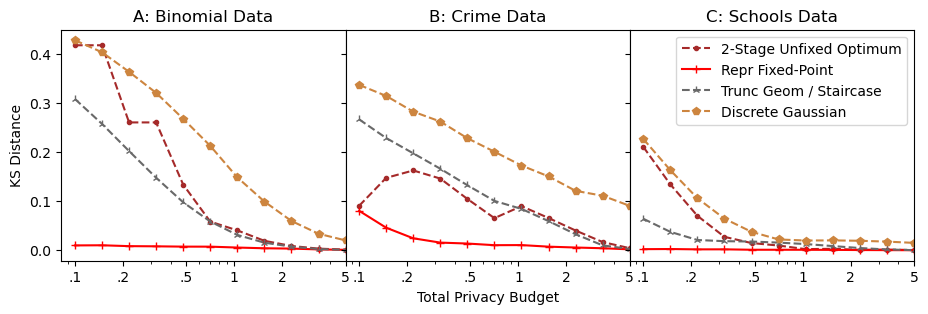

In [32]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(11, 3))
plt.subplots_adjust(wspace=0)


for method in methods_dist_plot:
    temp = binom_cost_res[binom_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[0].plot(temp['total_epsilon'], temp['mean KS distance'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])
    
ax[0].set_xscale('log')
ax[0].set_xticks([.1,.2 , .5, 1,2,5])
ax[0].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[0].set_xlim((0,5))
ax[0].set_ylabel("KS Distance")
ax[0].set_title("A: Binomial Data")

############

for method in methods_dist_plot:
    temp = crime_cost_res[crime_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[1].plot(temp['total_epsilon'], temp['mean KS distance'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[1].set_xscale('log')
ax[1].set_xticks([.1,.2 , .5, 1,2,5])
ax[1].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[1].set_xlim((0,5))
ax[1].set_xlabel("Total Privacy Budget")
ax[1].set_title("B: Crime Data")

##############

for method in methods_dist_plot:
    temp = school_cost_res[school_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[2].plot(temp['total_epsilon'], temp['mean KS distance'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[2].set_xscale('log')
ax[2].set_xticks([.1,.2 , .5, 1,2,5])
ax[2].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[2].set_xlim((0,5))
ax[2].legend(loc='upper right') 
ax[2].set_title("C: Schools Data")

plt.show()
#plt.savefig('distribution_differences_combined.png', bbox_inches='tight')

### Plot: Wasserstein Distance -- Figure 5 in Paper

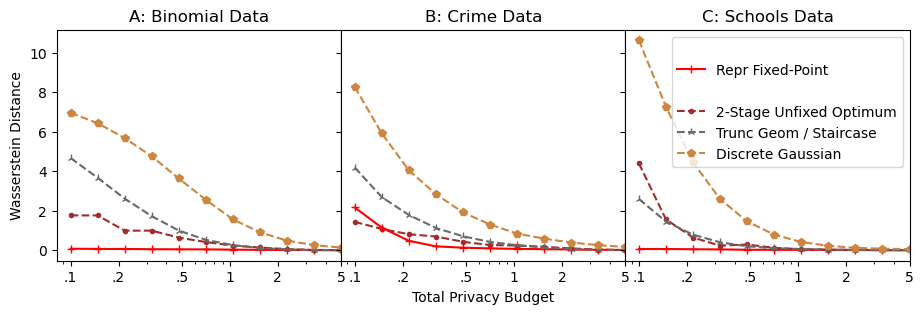

In [35]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(11, 3))
plt.subplots_adjust(wspace=0)


fp_dist_plot = ['sandwich_heuristic_constructor']

uf_dist_plot = ['unfixed_baseline_constructor', 'truncated_geom', 'discrete_gaussian']

ax[0].plot([], [], ' ', label=" ") ## For spacing

for method in fp_dist_plot:
    temp = binom_cost_res[binom_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[0].plot(temp['total_epsilon'], temp['mean wasserstein'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[0].plot([], [], ' ', label=" ") ## For spacing
    
for method in uf_dist_plot:
    temp = binom_cost_res[binom_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[0].plot(temp['total_epsilon'], temp['mean wasserstein'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])
        
    
ax[0].set_xscale('log')
ax[0].set_xticks([.1,.2 , .5, 1,2,5])
ax[0].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[0].set_xlim((0,5))
ax[0].set_ylabel("Wasserstein Distance")
ax[0].set_title("A: Binomial Data")

############

for method in methods_dist_plot:
    temp = crime_cost_res[crime_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[1].plot(temp['total_epsilon'], temp['mean wasserstein'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[1].set_xscale('log')
ax[1].set_xticks([.1,.2 , .5, 1,2,5])
ax[1].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[1].set_xlim((0,5))
ax[1].set_xlabel("Total Privacy Budget")
ax[1].set_title("B: Crime Data")

##############

ax[2].plot([], [], ' ', label=" ") ## For spacing

for method in fp_dist_plot:
    temp = school_cost_res[school_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[2].plot(temp['total_epsilon'], temp['mean wasserstein'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

ax[2].plot([], [], ' ', label=" ") ## For spacing
    
for method in uf_dist_plot:
    temp = school_cost_res[school_cost_res.method == method]
    temp['total_epsilon'] = np.where(temp.laplace_epsilon == np.inf, temp['counting_epsilon'], temp['counting_epsilon']+temp['laplace_epsilon'])
    ax[2].plot(temp['total_epsilon'], temp['mean wasserstein'], label = labels_dist_error[method], marker = markers[method], linestyle = linestyles[method], color = colors_dist_error[method])

    
ax[2].set_xscale('log')
ax[2].set_xticks([.1,.2 , .5, 1,2,5])
ax[2].set_xticklabels(['.1', '.2','.5','1', '2', '5' ])
ax[2].set_xlim((0,5))
ax[2].set_title("C: Schools Data")

ax[2].legend(loc='upper right')

plt.show()
#plt.savefig('distribution_differences_combined.png', bbox_inches='tight', dpi = 300)